# Visualizing the Relationship between Foxm1 and Rhno1 Expression Levels from Aggregated scRNA-seq Data

## - Import Python modules

In [2]:
# statement to generate plotly offline graphs within Jupyter
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# statement needed to save plots generated from `plotly.offline` when working in Jupyter notebook
import plotly.offline as offline
import plotly.graph_objs as go

%matplotlib inline
import os 
import glob
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import pandas as pd

## - Download scRNA-seq expression datasets from GEO FTP site

In [3]:
#os.chdir('./workspace/data')
#
#os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70235/suppl/GSE70235_Bulk.txt.gz')
#os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70236/suppl/GSE70236_Cmp.txt.gz')
#os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70238/suppl/GSE70238_GG1.txt.gz')
#os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70239/suppl/GSE70239_Gfi1.Null.txt.gz')
#os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70240/suppl/GSE70240_Gmp.txt.gz')
#os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70241/suppl/GSE70241_IG2.txt.gz')
#os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70242/suppl/GSE70242_Irf8.Null.txt.gz')
#os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70243/suppl/GSE70243_LK.CD34+.txt.gz')
#os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70244/suppl/GSE70244_Lsk.txt.gz')
#os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE78nnn/GSE78907/suppl/GSE78907_Gfi1.Null.Irf8.Null.txt.gz')
#
#os.system('gzip -d *.txt.gz')

## - Read in and manipulate the gene expression datasets

In [4]:
'''Reading each of the tab-seperated expression datasets into DataFrame object'''

df_bulk = pd.read_csv('{}/data/GSE70235_Bulk.txt'.format(os.getcwd()), sep='\t')
df_cmp = pd.read_csv('{}/data/GSE70236_Cmp.txt'.format(os.getcwd()), sep='\t')
df_gg1 = pd.read_csv('{}/data/GSE70238_GG1.txt'.format(os.getcwd()), sep='\t')
df_gfi1_null = pd.read_csv('{}/data/GSE70239_Gfi1.Null.txt'.format(os.getcwd()), sep='\t')
df_gmp = pd.read_csv('{}/data/GSE70240_Gmp.txt'.format(os.getcwd()), sep='\t')
df_ig2 = pd.read_csv('{}/data/GSE70241_IG2.txt'.format(os.getcwd()), sep='\t')
df_irf8_null = pd.read_csv('{}/data/GSE70242_Irf8.Null.txt'.format(os.getcwd()), sep='\t')
df_lk = pd.read_csv('{}/data/GSE70243_LK.CD34+.txt'.format(os.getcwd()), sep='\t')
df_lsk = pd.read_csv('{}/data/GSE70244_Lsk.txt'.format(os.getcwd()), sep='\t')
df_gfi1_irf8_nulls = pd.read_csv('{}/data/GSE78907_Gfi1.Null.Irf8.Null.txt'.format(os.getcwd()), sep='\t')

In [5]:
'''looking into df_bulk overall arrangment'''
df_bulk.head()

,UID,11RosaH,12RosaH,14RosaF,16RosaF,17Rosa-,18Rosa-,8RosaH,9RosaH,CAG-14914,CAG-14915,CMP,GMP,Gfi1.Null,Irf8.Null,LSK
0,Marc1,0.000000,0.286881,0.000000,0.201634,0.000000,0.000000,0.214125,0.214125,0.150560,0.000000,0.389567,0.310340,0.150560,0.263034,0.111031
1,March1,0.536053,0.839960,1.521051,0.400538,4.091700,1.432959,2.378512,1.735522,4.786074,2.307429,0.485427,1.021480,0.575312,0.411426,1.144046
2,Marc2,6.060264,6.103917,6.001577,6.098453,5.475409,5.460415,5.883621,5.965092,5.471513,5.859224,6.508429,6.452530,6.391287,6.786727,6.506526
3,March2,4.024142,4.358959,4.873813,4.542258,5.110196,4.761817,4.552746,4.291309,4.947199,5.034304,4.930264,5.083639,5.014355,5.305241,5.416840
4,March3,1.201634,0.925999,0.505891,0.963474,0.941106,0.815575,0.389567,0.773996,0.992768,0.895303,0.739848,0.632268,0.321928,0.584963,2.153805


In [6]:
def mainpulate(data_frame):
    '''This function takes a dataframe object and sets the first column as the index'''
    '''It selects Foxm1 and Rhno1 genes in the columns'''
    data_frame.columns.values[0] = 'uid' 
    data_frame = data_frame.set_index('uid') # assign the genes column as the index 
    data_frame = data_frame.loc[data_frame.index.isin(['Foxm1','Rhno1'])] # only select the genes from the index
    #print(data_frame)

    return data_frame # return the input dataframe object

In [7]:
#def set_variables(data_frame):
#    x,y = data_frame['Foxm1'], data_frame['Rhno1']
#    return x,y

In [8]:
'''runing `mainpulate()` on each of the DataFrame objects'''
df_bulk = mainpulate(df_bulk)
df_cmp = mainpulate(df_cmp)
df_gg1 = mainpulate(df_gg1)
df_gfi1_null = mainpulate(df_gfi1_null)
df_gmp = mainpulate(df_gmp)
df_ig2 = mainpulate(df_ig2)
df_irf8_null = mainpulate(df_irf8_null)
df_lk = mainpulate(df_lk)
df_lsk = mainpulate(df_lsk)
df_gfi1_irf8_nulls = mainpulate(df_gfi1_irf8_nulls)

In [9]:
'''examining df_bulk object after running the function'''
df_bulk.head()

,11RosaH,12RosaH,14RosaF,16RosaF,17Rosa-,18Rosa-,8RosaH,9RosaH,CAG-14914,CAG-14915,CMP,GMP,Gfi1.Null,Irf8.Null,LSK
uid,,,,,,,,,,,,,,,
Foxm1,5.295356,5.413797,5.392317,5.454176,5.853247,5.810443,5.423914,5.148527,6.089583,5.609105,5.471838,5.665052,4.945327,4.851499,5.555816
Rhno1,4.618239,4.848498,4.586765,5.095924,4.316146,5.121015,4.771357,4.982765,4.405992,5.068671,5.511278,5.610287,5.305971,5.696828,5.837943


In [10]:
#df_bulk = set_variables(mainpulate(df_bulk))
#df_cmp = set_variables(mainpulate(df_cmp))
#df_gg1 = set_variables(mainpulate(df_gg1))
#df_gfi1_null = set_variables(mainpulate(df_gfi1_null))
#df_gmp = set_variables(mainpulate(df_gmp))
#df_ig2 = set_variables(mainpulate(df_ig2))
#df_irf8_null = set_variables(mainpulate(df_irf8_null))
#df_lk = set_variables(mainpulate(df_lk))
#df_lsk = set_variables(mainpulate(df_lsk))
#df_gfi1_irf8_nulls = set_variables(mainpulate(df_gfi1_irf8_nulls))

In [11]:
'''join the datasets into a single DataFrame object '''
df_all = df_bulk.join(df_cmp).join(df_gg1).join(df_gfi1_null).join(df_gmp).join(df_ig2).join(df_irf8_null).join(df_lk).join(df_lsk).join(df_gfi1_irf8_nulls)

In [12]:
'''transpose the DataFrame object, such that the genes become the columns '''
df_all = df_all.T
df_all

uid,Foxm1,Rhno1
11RosaH,5.295356,4.618239
12RosaH,5.413797,4.848498
14RosaF,5.392317,4.586765
16RosaF,5.454176,5.095924
17Rosa-,5.853247,4.316146
18Rosa-,5.810443,5.121015
8RosaH,5.423914,4.771357
9RosaH,5.148527,4.982765
CAG-14914,6.089583,4.405992
CAG-14915,5.609105,5.068671


In [13]:
'''the dimentions of df_all object (rows, columns)'''
df_all.shape

(675, 2)

In [14]:
'''deleting data points where Foxm1 or Rhno1 expression equal to zero'''
df_all = df_all[df_all['Foxm1'] != 0]
df_all = df_all[df_all['Rhno1'] != 0]

In [15]:
'''examining the number of rows after the deletion'''
df_all.shape

(222, 2)

In [16]:
'''deleting data points where Foxm1 or Rhno1 expression less than 1'''
df_all = df_all.loc[df_all['Foxm1'] > 1]
df_all = df_all.loc[df_all['Rhno1'] > 1]

In [17]:
'''examining the number of rows after applying the second deletion'''
df_all.shape

(170, 2)

## - Scatter plot and regression line: show the relationship between Foxm1 and Rhno1 

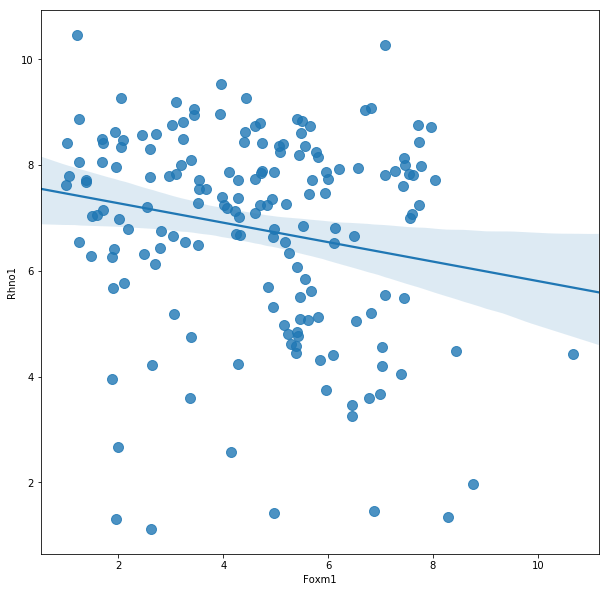

In [18]:
'''normal scale.  The regression line with 95% confidence interval '''
f, ax = plt.subplots(figsize=(10,10))

sns.regplot(x=df_all['Foxm1'], 
            y=df_all['Rhno1'],
            ax=ax, 
            scatter_kws={'s':100})

## - Scatter plot and regression line: show the relationship between Foxm1 and Rhno1 (log scale)

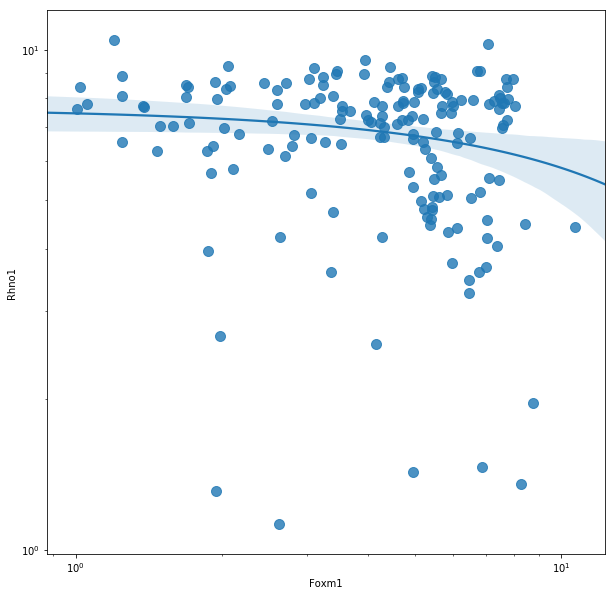

In [19]:
'''using log scale.  The regression line with 95% confidence interval'''
f, ax = plt.subplots(figsize=(10,10))

ax.set(xscale='log', yscale='log')

sns.regplot(x=df_all['Foxm1'], 
            y=df_all['Rhno1'], 
            ax=ax, 
            scatter_kws={'s':100})

## - Pearson's Correlation Coefficient

In [20]:
df_all['Rhno1'].corr(df_all['Foxm1'])

-0.19474494613904222

## - Histograms: show the distribution of Foxm1 and Rhno1 expression:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A712322128>]], dtype=object)

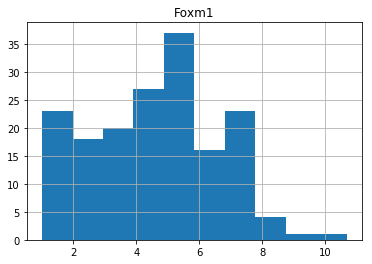

In [21]:
df_all.hist('Foxm1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A711D06D68>]], dtype=object)

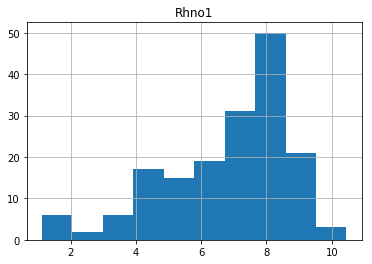

In [22]:
df_all.hist('Rhno1')

In [23]:
df_trace_foxm1 = go.Histogram(x=df_all['Foxm1'], opacity=0.75, name='Foxm1')
df_trace_rhno1 = go.Histogram(x=df_all['Rhno1'], opacity=0.75, name='Rhno1')
data = [df_trace_foxm1,df_trace_rhno1]
layout = go.Layout(barmode='overlay', )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## - Other preliminary scatter plots

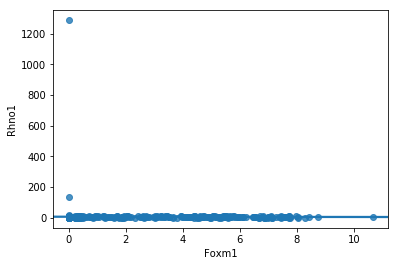

In [9]:
sns.regplot(x=df_all['Foxm1'], y=df_all['Rhno1'])

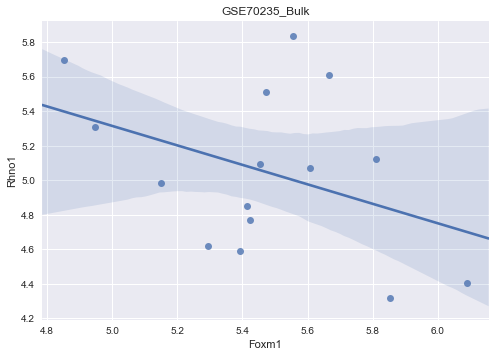

In [6]:
sns.regplot(x=df_bulk['Foxm1'], y=df_bulk['Rhno1']).set_title('GSE70235_Bulk')

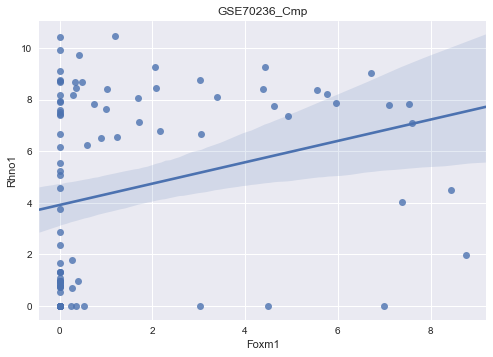

In [7]:
sns.regplot(x=df_cmp['Foxm1'], y=df_cmp['Rhno1']).set_title('GSE70236_Cmp')

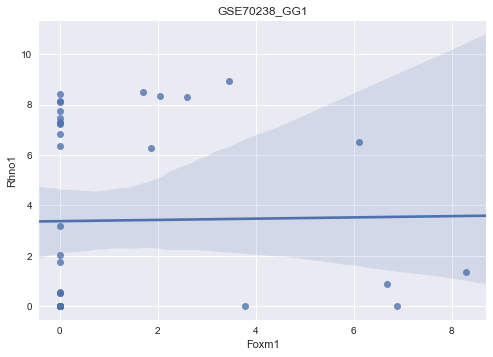

In [8]:
sns.regplot(x=df_gg1['Foxm1'], y=df_gg1['Rhno1']).set_title('GSE70238_GG1')

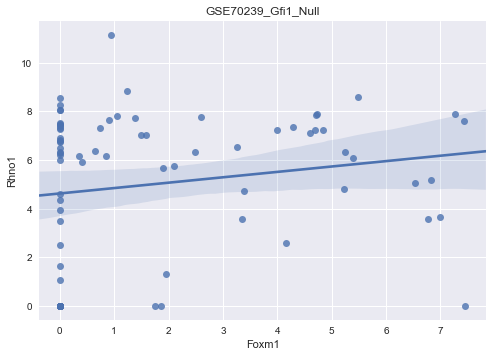

In [9]:
sns.regplot(x=df_gfi1_null['Foxm1'], y=df_gfi1_null['Rhno1']).set_title('GSE70239_Gfi1_Null')

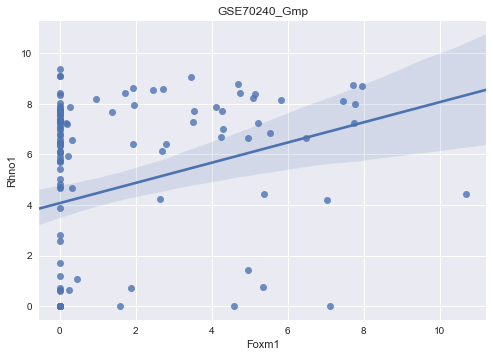

In [10]:
sns.regplot(x=df_gmp['Foxm1'], y=df_gmp['Rhno1']).set_title('GSE70240_Gmp')

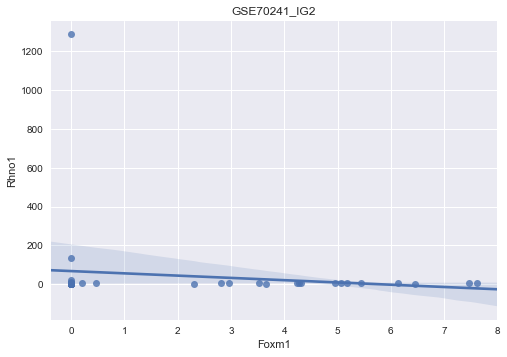

In [11]:
sns.regplot(x=df_ig2['Foxm1'], y=df_ig2['Rhno1']).set_title('GSE70241_IG2')

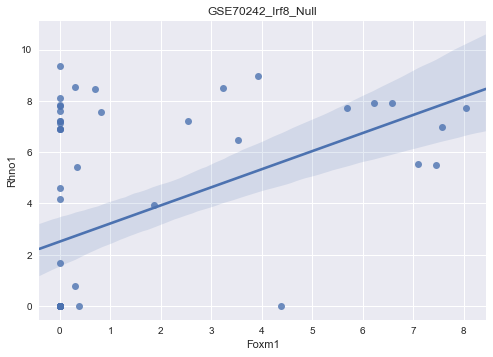

In [12]:
sns.regplot(x=df_irf8_null['Foxm1'], y=df_irf8_null['Rhno1']).set_title('GSE70242_Irf8_Null')

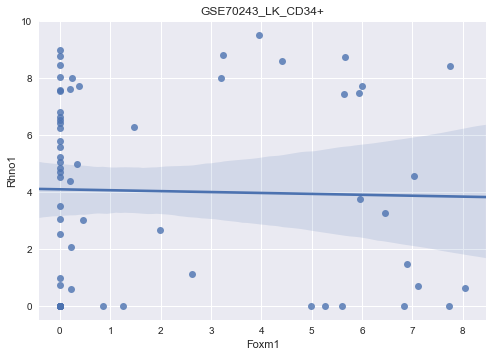

In [13]:
sns.regplot(x=df_lk['Foxm1'], y=df_lk['Rhno1']).set_title('GSE70243_LK_CD34+')

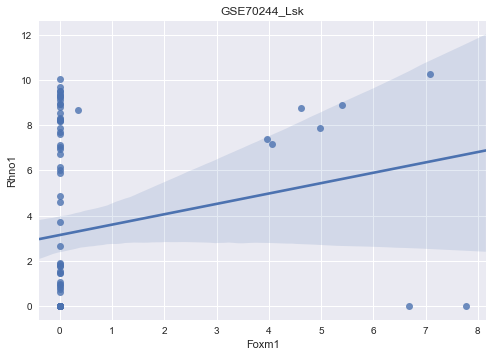

In [14]:
sns.regplot(x=df_lsk['Foxm1'], y=df_lsk['Rhno1']).set_title('GSE70244_Lsk')

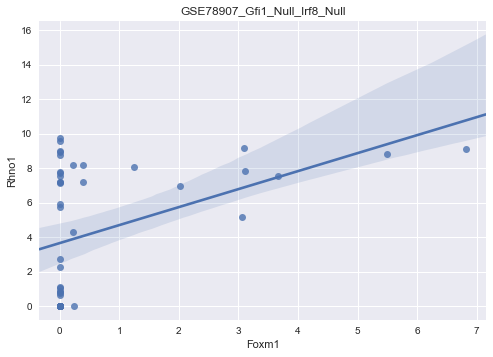

In [15]:
sns.regplot(x=df_gfi1_irf8_nulls['Foxm1'], y=df_gfi1_irf8_nulls['Rhno1']).set_title('GSE78907_Gfi1_Null_Irf8_Null')

In [12]:
x,y = df_bulk['Foxm1'], df_bulk['Rhno1']

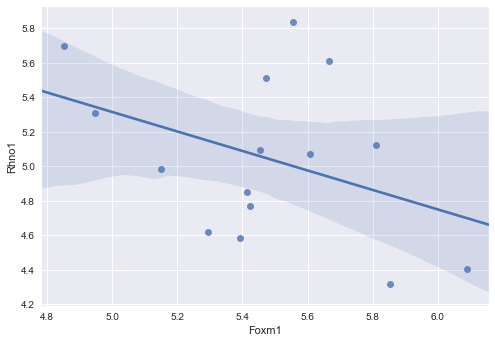

In [13]:
sns.regplot(x=x, y=y)